# Nama : Mohammad Nurdin Prastya Hermansah

# NIM: 20507334047

# Prodi : D4 Teknik Elektronika

# **Machine Learning Exercise 2 - Logistic Regression**

Dalam latihan ini, kita akan mengimplementasikan regresi logistik dan menerapkannya pada tugas pengklasifikasian. Kita juga akan meningkatkan keandalan implementasi kita dengan menambahkan regularisasi pada algoritma pelatihan dan mengujinya pada masalah yang lebih sulit. 

Regresi logistik adalah teknik pemodelan yang digunakan untuk memprediksi probabilitas terjadinya suatu kejadian dengan menggunakan data masa lalu. Algoritma ini sering digunakan dalam pengklasifikasian (memprediksi apakah sesuatu termasuk dalam kelompok yang satu atau kelompok yang lain) dan sangat berguna dalam berbagai aplikasi, seperti pemasaran, keuangan, dan kedokteran. 

Regularisasi adalah teknik yang digunakan untuk menghindari overfitting (ketika model terlalu sesuai dengan data pelatihan, sehingga tidak generalisasi dengan baik pada data baru) dengan menambahkan penalti pada model yang terlalu kompleks

Dalam latihan ini kita akan menerapkan logistic regression untuk menerapkannya pada tugas pengklasifikasian. Kami juga akan meningkatkan ketahanan penerapan kami dengan menambahkan regularisasi ke algoritme pelatihan. dan mengujinya pada soal yang lebih sulit.

# **Logistic regression**

Pada bagian pertama dari latihan ini, kita akan membuat model regresi logistik untuk memprediksi apakah siswa akan diterima di universitas. Misalkan Anda adalah administrator departemen universitas dan ingin menentukan kemungkinan penerimaan setiap pelamar berdasarkan hasil ujian mereka. Anda memiliki data historis dari pelamar sebelumnya yang dapat Anda gunakan sebagai set pelatihan untuk regresi logistik. Untuk setiap contoh pelatihan, Anda memiliki skor pelamar pada dua ujian dan keputusan penerimaan. Untuk menyelesaikan ini, kita akan membuat model pengklasifikasian yang mengestimasi probabilitas penerimaan berdasarkan skor ujian. Model ini akan memprediksi probabilitas siswa diterima di universitas berdasarkan skor ujian yang telah mereka dapatkan.

**Tahap 1**

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ex2data1.txt to ex2data1.txt


In [3]:
# load data
import io
data = pd.read_csv(io.BytesIO(uploaded['ex2data1.txt']))
data.head(12)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


**Tahap 2**

Mari buat persebaran plot dari dua skor dan gunakan kode warna untuk memvisualisasikan jika contohnya positif (diterima) atau negatif (tidak diterima).

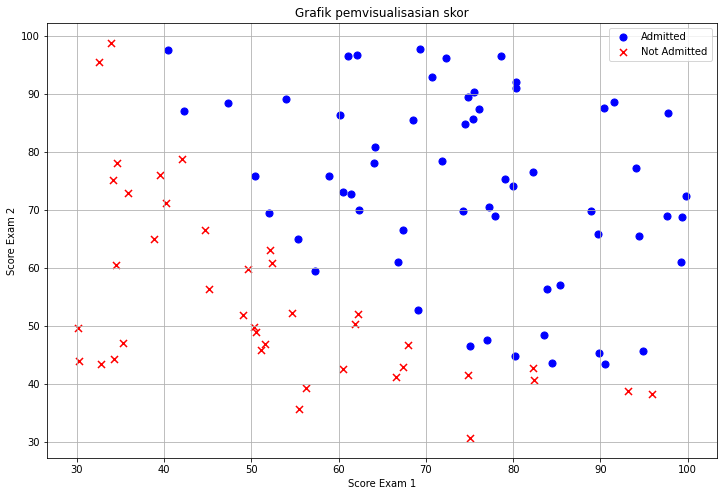

In [5]:
# plot skor positif dengan mangmbil nilai 1 pada data.
positive = data[data['Admitted'].isin([1])]
# plot skor negatif dengan mangmbil nilai 0 pada data.
negative = data[data['Admitted'].isin([0])]

# menampilkan hasil pemvisualisasian skor
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Score Exam 1')
ax.set_ylabel('Score Exam 2')
plt.title('Grafik pemvisualisasian skor')
ax.grid()

**Penjelasan**

Tampaknya ada batas keputusan yang jelas antara dua kelas. Sekarang kita perlu mengimplementasikan regresi logistik sehingga kita dapat melatih model untuk memprediksi hasilnya.

**Tahap 3**

Langkah selanjutnya kita perlu membuat fungsi sigmoid. Kode untuk ini cukup sederhana.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Penjelasan**

Fungsi sigmoid adalah fungsi aktivasi yang sering digunakan dalam jaringan saraf. Fungsi ini menerima parameter z dan mengembalikan nilai sigmoid dari z. Nilai sigmoid didefinisikan sebagai:

sigmoid(z) = 1 / (1 + exp(-z))

Fungsi sigmoid memiliki sifat yang mengubah setiap nilai input menjadi nilai antara 0 dan 1, yang berguna untuk tugas klasifikasi biner.

Fungsi sigmoid juga memiliki sifat yang dapat dihitung turunannya, yang berguna untuk melatih jaringan saraf menggunakan metode gradient descent.

**Tahap 4**

Marilah kita lakukan cek kecerdasan yang cepat untuk memastikan bahwa fungsi tersebut bekerja. "Sanity check" atau cek kecerdasan adalah tes sederhana yang dilakukan untuk memastikan bahwa suatu sistem atau proses bekerja dengan benar. Ini sering digunakan untuk memastikan bahwa suatu implementasi baru tidak mengandung kesalahan yang jelas atau tidak masuk akal, sebelum melanjutkan ke tahap selanjutnya. 

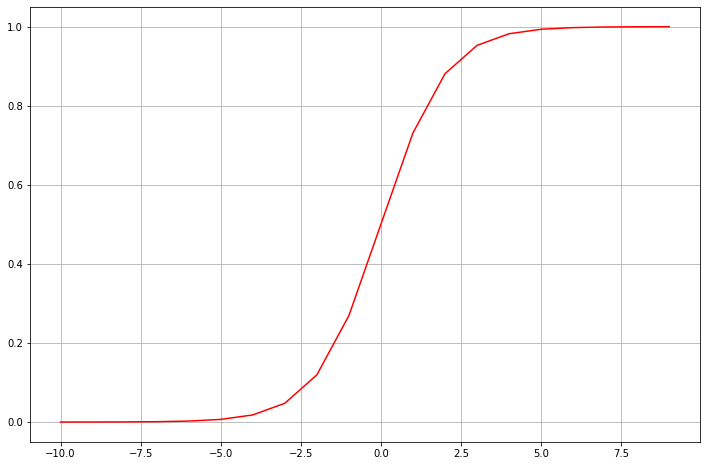

(None, None)

In [7]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.grid(), plt.show()

**Tahap 5**

Sekarang kita perlu menulis cost function untuk mengevaluasi suatu solusi. Cost function adalah ukuran kualitas dari suatu model. Kita menggunakan cost function untuk mengevaluasi model yang telah kita buat dan membandingkannya dengan model lain untuk melihat mana yang paling baik.

In [8]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

**Penjelasan**

Fungsi cost menghitung biaya dari penggunaan theta sebagai parameter untuk regresi logistik untuk menyesuaikan titik-titik data dalam X dan y.

Fungsi tersebut pertama-tama menghitung sigmoid dari X * theta.T, di mana X adalah matriks desain dan theta adalah vektor parameter model. Ini menghasilkan matriks nilai probabilitas yang diprediksi untuk setiap titik data.

Kemudian, fungsi tersebut menghitung produk elemen per elemen dari -y dan log(sigmoid(X * theta.T)), serta produk elemen per elemen dari (1 - y) dan log(1 - sigmoid(X * theta.T)). Kedua matriks tersebut dijumlahkan secara elemen per elemen, dan hasilnya dibagi dengan jumlah titik data untuk mendapatkan biaya rata-rata di seluruh titik data.

Output dari fungsi cost adalah nilai skalar yang mewakili biaya rata-rata dari model. Biaya yang lebih rendah menunjukkan bahwa model lebih baik dalam menyesuaikan data.

**Tahap 6**

Sekarang kita perlu melakukan beberapa pengaturan, serupa dengan yang kita lakukan pada latihan 1 untuk regresi linier.

In [10]:
# add a ones column - ini akan membuat perkalian matriks berjalan dengan mudah
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

Mari periksa bentuk dari array untuk memastikan semuanya terlihat bagus.

In [11]:
# bentuk array
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

**Tahap 7**

Sekarang mari kita hitung biaya untuk solusi awal kita (nilai 0 untuk theta).

In [12]:
cost(theta, X, y)

0.6931471805599453

**Penjelasan**

Sekarang marilah kita hitung biaya untuk solusi awal kita (nilai 0 untuk theta). Theta adalah parameter dari model regresi logistik yang digunakan untuk memprediksi kemungkinan terjadinya suatu kejadian. Theta terdiri dari beberapa bobot dan bias yang mewakili kekuatan dari setiap fitur dalam data yang kita gunakan. Nilai theta yang tepat akan membantu kita memprediksi kemungkinan terjadinya suatu kejadian dengan tepat. Jika kita menetapkan nilai theta ke 0, maka kita tidak memperhitungkan pengaruh dari fitur-fitur tersebut dalam model kita. Sehingga, saat menghitung biaya untuk solusi awal ini, kita tidak menghitung pengaruh dari fitur-fitur tersebut dalam perhitungan biaya.

**Tahap 8**

Selanjutnya, kita perlu sebuah fungsi untuk menghitung gradien (pembaruan parameter) berdasarkan data pelatihan, label, dan beberapa parameter theta. 

Gradien adalah turunan dari fungsi biaya terhadap bobot dan bias dari model. Kita menggunakan gradien untuk memperbarui nilai dari bobot dan bias selama proses pelatihan, sehingga dapat meminimalkan nilai dari fungsi biaya dan meningkatkan akurasi dari model. Proses pembaruan ini dilakukan secara iteratif sampai model mencapai konvergensi (tidak ada lagi peningkatan yang signifikan dari akurasi model).

In [13]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

**Penjelasan**

Fungsi gradient menghitung turunan dari fungsi biaya terhadap parameter model theta.

Fungsi ini menerima tiga argumen: theta, X, dan y. theta adalah vektor parameter model, X adalah matriks desain, dan y adalah vektor nilai target.

Fungsi tersebut pertama-tama menghitung kesalahan antara nilai probabilitas yang diprediksi (dihitung menggunakan fungsi sigmoid) dan nilai target sebenarnya.

Kemudian, ia mengelilingi setiap parameter di theta, menghitung turunan parsial dari fungsi biaya terhadap parameter tersebut, dan menyimpan hasilnya dalam array grad. Turunan parsial dihitung menggunakan kesalahan dan kolom yang sesuai dari matriks desain.

Akhirnya, fungsi tersebut mengembalikan array grad, yang merupakan vektor turunan yang berisi turunan parsial dari fungsi biaya terhadap setiap parameter di theta. Vektor turunan ini digunakan untuk memperbarui parameter dalam proses optimisasi iteratif, seperti gradient descent.

Perhatikan bahwa kita sebenarnya tidak melakukan turunan gradien dalam fungsi ini - kita hanya menghitung satu langkah gradien. Dalam latihan, sebuah fungsi Octave yang disebut "fminunc" digunakan untuk mengoptimalkan parameter dengan menggunakan fungsi untuk menghitung biaya dan gradien. 

Karena kita menggunakan Python, kita bisa menggunakan namespace "optimize" dari SciPy untuk melakukan hal yang sama. "Gradient descent" atau turunan gradien adalah algoritma yang digunakan untuk mengoptimalkan fungsi dengan mengikuti arah dari gradien terbesar. Algoritma ini akan melakukan pembaruan terhadap bobot dan bias secara iteratif sampai mencapai konvergensi (tidak ada lagi peningkatan yang signifikan dari akurasi model).

Let's look at a single call to the gradient method using our data and initial paramter values of 0.

In [14]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

**Tahap 9**

Now we can use SciPy's truncated newton (TNC) implementation to find the optimal parameters.

In [15]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131857,   0.20623159,   0.20147149]), 36, 0)

**Penjelasan**

Sekarang kita bisa menggunakan implementasi truncated newton (TNC) dari SciPy untuk menemukan parameter yang optimal. Truncated Newton atau TNC adalah metode optimisasi yang digunakan untuk menemukan nilai yang meminimalkan suatu fungsi. Metode ini merupakan modifikasi dari metode Newton-Raphson yang telah terkenal sebelumnya. Metode TNC membatasi jumlah iterasi yang dilakukan dan menggunakan pengecekan konvergensi yang lebih ketat, sehingga lebih stabil dan efisien daripada metode Newton-Raphson.

**Tahap 10**

Let's see what the our cost looks like with this solution.

In [16]:
cost(result[0], X, y)

0.20349770158947483

**Tahap 11**

Selanjutnya, kita perlu menulis sebuah fungsi yang akan mengeluarkan prediksi untuk suatu dataset X menggunakan parameter theta yang telah kita pelajari. Kita kemudian bisa menggunakan fungsi ini untuk menilai akurasi pelatihan dari kelasifikasi kita. Fungsi ini akan menerima dataset X dan parameter theta sebagai input dan mengeluarkan prediksi untuk setiap contoh dalam dataset. Kita bisa menggunakan prediksi ini untuk menghitung seberapa akurat model kita dalam memprediksi kelas dari contoh-contoh dalam dataset.

In [17]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

**Penjelasan**

code ini bertujuan untuk melakukan prediksi terhadap sesuatu berdasarkan parameter theta dan data X. Fungsi ini mengembalikan sebuah list yang terdiri dari angka 1 atau 0, tergantung pada hasil dari fungsi sigmoid dari perhitungan X * theta.T. Jika hasilnya lebih besar atau sama dengan 0.5, maka elemen dalam list akan bernilai 1. Jika hasilnya kurang dari 0.5, maka elemen dalam list akan bernilai 0.

In [18]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


**penjelasan**

Block kode ini digunakan untuk menghitung tingkat akurasi dari suatu model prediksi. Pertama, variabel theta_min diinisialisasi dengan nilai dari elemen pertama dari hasil yang dihasilkan oleh fungsi optimisasi yang telah dijalankan sebelumnya. Kemudian, fungsi predict() dipanggil dengan parameter theta_min dan X untuk menghasilkan sebuah list yang berisi prediksi dari model.

Setelah itu, variabel correct diinisialisasi dengan sebuah list comprehension yang menghitung jumlah prediksi yang benar dengan cara membandingkan elemen-elemen dari list predictions dan y. Jika kedua elemen tersebut sama, maka akan dianggap benar dan nilai 1 akan ditambahkan ke dalam list correct. Jika tidak, maka nilai 0 akan ditambahkan ke dalam list correct.

Terakhir, tingkat akurasi dihitung dengan menjumlahkan semua elemen dalam list correct, lalu menghitung modulo dari jumlah tersebut dengan panjang dari list correct. Hasilnya kemudian diformat dengan string dan dicetak ke layar.






**KESIMPULAN**

Klasifikasi regresi logistik kita dengan benar memprediksi apakah siswa diterima atau tidak 89% dari waktu. Tidak buruk! Perlu diingat bahwa ini adalah akurasi set pelatihan. Kita tidak menyimpan set hold-out atau menggunakan cross-validation untuk mendapatkan perkiraan yang benar dari akurasi, sehingga angka ini mungkin lebih tinggi dari performa sebenarnya (topik ini dibahas dalam latihan berikutnya).

# **Regularized logistic regression**

Dalam bagian kedua dari latihan ini, kita akan meningkatkan algoritma regresi logistik kita dari bagian pertama dengan menambahkan istilah regularisasi. Jika Anda tidak familiar dengan regularisasi, atau ingin mempelajari lebih lanjut tentang persamaan yang digunakan dalam bagian ini, silakan merujuk pada "ex2.pdf" di folder "latihan". Secara singkat, regularisasi adalah istilah dalam fungsi biaya yang menyebabkan algoritma lebih memilih model yang "lebih sederhana" (dalam hal ini, model dengan koefisien yang lebih kecil). Teori yang mendasari adalah bahwa ini membantu untuk meminimalkan overfitting dan meningkatkan kemampuan model untuk mengeneralisasikan. Dengan demikian, mari kita mulai.

**Tahap 1**

Jika Anda adalah manajer produk pabrik dan Anda memiliki hasil tes untuk beberapa mikrochip pada dua tes yang berbeda. Dari dua tes ini, Anda ingin menentukan apakah mikrochip harus diterima atau ditolak. Untuk membantu Anda membuat keputusan, Anda memiliki dataset hasil tes pada mikrochip masa lalu, dari mana Anda dapat membangun model regresi logistik.

Similar to part 1, let's start by visualizing the data.

In [19]:
from google.colab import files
uploaded = files.upload()

Saving ex2data2.txt to ex2data2.txt


In [21]:
import io
data2 = pd.read_csv(io.BytesIO(uploaded['ex2data2.txt']))
data2.head(12)

,Test 1,Test 2,Accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


Text(0, 0.5, 'Test 2 Score')

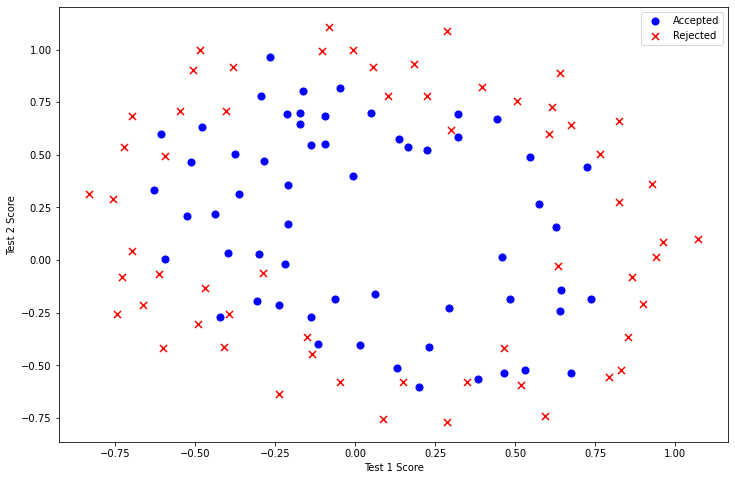

In [22]:
# ploting nilai 1 ke variabel positif
positive = data2[data2['Accepted'].isin([1])]
# ploting nilai 0 ke variabel negatif
negative = data2[data2['Accepted'].isin([0])]

# ploting data
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

**Penjelasan**

Data ini terlihat sedikit lebih rumit daripada contoh sebelumnya. Terutama, Anda akan melihat bahwa tidak ada batas keputusan linear yang akan bekerja dengan baik pada data ini. Salah satu cara untuk menangani ini dengan menggunakan teknik linear seperti regresi logistik adalah dengan membuat fitur yang diperoleh dari polinomial dari fitur asli. Mari kita mulai dengan membuat banyak fitur polinomial.

**Tahap 2**

Membuat fitur polonomial

In [23]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


**Penjelasan**

Pada kode di atas, pertama-tama variabel degree diberi nilai 5. Kemudian, variabel x1 diisi dengan kolom 'Test 1' dari dataframe data2, dan variabel x2 diisi dengan kolom 'Test 2' dari dataframe data2.

Setelah itu, pada baris ketiga, kolom 'Ones' dengan nilai 1 ditambahkan ke dataframe data2 pada indeks ke-3.

Lalu, pada blok perulangan for, looping dilakukan sebanyak degree - 1 kali. Pada setiap iterasinya, looping dilakukan lagi dengan indeks j yang dimulai dari 0 hingga i. Pada setiap iterasi dari looping kedua ini, kolom baru dengan nama 'F' + str(i) + str(j) ditambahkan ke dataframe data2, diisi dengan hasil dari perpangkatan x1 dengan i-j dan x2 dengan j.

Setelah itu, kolom 'Test 1' dan 'Test 2' dihapus dari dataframe data2 dengan menggunakan method drop(). Kemudian, method head() pada dataframe data2 dijalankan untuk menampilkan 5 baris pertama dari dataframe tersebut.

**Tahap 3**

Sekarang kita perlu memodifikasi fungsi biaya dan gradient dari bagian 1 untuk mencakup istilah regularisasi. Pertama, fungsi biaya:

In [24]:
# menghitung fungsi sigmoid untuk mengubah nilai menjadi rentang 0 - 1
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [26]:
# menghitung fungsi cost guna mengevaluasi model
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

**Pejelasan**

Perhatikan istilah "reg" dalam persamaan. Juga perhatikan penambahan parameter "learning rate". Ini adalah hyperparameter yang mengontrol efektivitas istilah regularisasi. Sekarang kita perlu menambahkan regularisasi ke fungsi gradient:

In [27]:
# gradien digukan untuk melakukan peminimalan nilai cost function
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

**Tahap 4**

Initialize variables like we did in part 1.

In [28]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

**Tahap 5**

Mari kita inisialisasikan learning rate kita dengan nilai yang masuk akal. Kita dapat memainkan nilai ini nanti jika perlu (misalnya jika penalisasi terlalu kuat atau tidak cukup kuat).

In [29]:
learningRate = 1

**Tahap 6**

Sekarang mari kita coba memanggil fungsi regularisasi baru kita dengan nilai default (0) untuk theta untuk memastikan perhitungannya bekerja.

In [30]:
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

In [31]:
gradientReg(theta2, X2, y2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

**Tahap 7**

Now we can use the same optimization function from part 1 to compute the optimal solution.

In [32]:
import scipy
result2 = scipy.optimize.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 1.22702480e-04,  7.19893533e-05, -3.74156020e-04, -1.44256518e-04,
         2.93168594e-05, -5.64160697e-05, -1.02826715e-04, -2.83150640e-04,
         6.47460472e-07, -1.99697745e-04, -1.68479401e-05]), 97, 1)

**Tahap 8**

Finally, we can use the prediction function from part 1 to see how accurate our solution is on the training data.

In [33]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 77%


**Penjelasan**

Meskipun kita telah mengimplementasikan algoritma ini dari awal, perlu dicatat bahwa kita juga dapat menggunakan library python tingkat tinggi seperti scikit-learn untuk menyelesaikan masalah ini. Dengan menggunakan scikit-learn, kita dapat dengan mudah menggunakan model regresi logistik dengan regularisasi dengan hanya beberapa baris kode saja. Library tersebut juga menyediakan banyak fitur yang berguna seperti cross-validation, pengaturan otomatis hyperparameter, dan visualisasi hasil.

In [34]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression()

In [35]:
model.score(X2, y2)

0.6610169491525424

**Penjelasan**

Akurasi yang dihasilkan jauh lebih rendah daripada yang kita peroleh sebelumnya, tetapi perlu diingat bahwa hasil ini menggunakan parameter default yang disediakan oleh scikit-learn. Kita mungkin perlu melakukan pengaturan parameter untuk mendapatkan akurasi yang sama dengan hasil sebelumnya. Library scikit-learn memiliki banyak fitur yang bisa digunakan untuk melakukan pengaturan parameter secara otomatis, seperti grid search dan random search. Kita juga dapat menggunakan metode manual seperti memodifikasi parameter secara bertahap dan mengevaluasi akurasi model setiap kali.